# Instalando o ambiente virutal

In [ ]:
#!pip install virtualenv

In [ ]:
#import os
#os.environ['PATH'] += os.pathsep + os.path.expanduser('~/.local/bin')


In [ ]:
#!~/.local/bin/virtualenv pavf

In [ ]:
#!pavf/bin/pip install ipykernel
#!pavf/bin/python -m ipykernel install --user --name=pavf

In [ ]:
#!pavf/bin/pip install pandas numpy tqdm torchaudio scikit-learn librosa ipython transformers


# Treinamento

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
from tqdm import tqdm

import torchaudio
from sklearn.model_selection import train_test_split

import os
import sys

In [2]:
#!pavf/bin/pip install git+https://github.com/huggingface/datasets.git git+https://github.com/huggingface/transformers.git jiwer torchaudio librosa wandb

In [3]:
# %%capture

# !pip install git+https://github.com/huggingface/datasets.git
# !pip install git+https://github.com/huggingface/transformers.git
# !pip install jiwer
# !pip install torchaudio
# !pip install librosa

# Monitor the training process
# !pip install wandb

In [4]:
%env LC_ALL=C.UTF-8
%env LANG=C.UTF-8
%env TRANSFORMERS_CACHE=./cache
%env HF_DATASETS_CACHE=./cache
%env CUDA_LAUNCH_BLOCKING=1

env: LC_ALL=C.UTF-8
env: LANG=C.UTF-8
env: TRANSFORMERS_CACHE=./cache
env: HF_DATASETS_CACHE=./cache
env: CUDA_LAUNCH_BLOCKING=1


# Download and preprocess data

In [5]:
#!pavf/bin/pip uninstall numpy -y
#!pavf/bin/pip install numpy

In [6]:
#!UNZIP_DISABLE_ZIPBOMB_DETECTION=TRUE unzip -o ./IRMAS-TrainingData.zip

In [7]:
csv_file_name = 'augmented_dataset_all.csv'

# Leia o arquivo CSV em um DataFrame
augmented_df = pd.read_csv(csv_file_name)

In [8]:
df = augmented_df

In [9]:
import os
import pandas as pd

# Paths to the dataset parts
dataset_paths = [
    './IRMAS/IRMAS-TestingData-Part1/Part1',
    './IRMAS/IRMAS-TestingData-Part2/IRTestingData-Part2',
    './IRMAS/IRMAS-TestingData-Part3/Part3'
]

# Initialize an empty list to store the data
data = []

# Loop through each dataset directory
for dataset_path in dataset_paths:
    # Loop through the files in the current dataset directory
    for filename in os.listdir(dataset_path):
        if filename.endswith('.txt'):
            txt_path = os.path.join(dataset_path, filename)
            wav_filename = filename.replace('.txt', '.wav')
            wav_path = os.path.join(dataset_path, wav_filename)

            # Read the content of the txt file
            with open(txt_path, 'r') as file:
                labels = file.read().split()

            # Join labels with a comma
            label_str = ','.join(labels)
            data.append({'file_path': wav_path, 'label': label_str})

# Create a DataFrame from the collected data
df_test = pd.DataFrame(data, columns=['file_path', 'label'])

In [10]:
#pip install --upgrade pip

In [11]:
#!pavf/bin/pip install numpy==1.23.5 librosa==0.9.2 torchaudio==0.12.1 soxr==0.3.4


In [12]:
import torchaudio
import librosa
import IPython.display as ipd
import numpy as np

idx = np.random.randint(0, len(df))
sample = df.iloc[idx]
path = sample["file_path"]
label = sample["label"]


print(f"ID Location: {idx}")
print(f"      Label: {label}")
print()

speech, sr = torchaudio.load(path)
speech = speech[0].numpy().squeeze()
speech = librosa.resample(np.asarray(speech), orig_sr=sr,target_sr=16000 )
ipd.Audio(data=np.asarray(speech), autoplay=True, rate=16000)

ID Location: 7392
      Label: vio



In [13]:
label_list = df.label.unique().tolist()
label_list

['cel',
 'cla',
 'flu',
 'gac',
 'gel',
 'org',
 'pia',
 'sax',
 'tru',
 'vio',
 'voi',
 'gel,voi',
 'cla,cel',
 'sax,cel',
 'flu,gac',
 'gac,pia',
 'gel,org',
 'org,pia',
 'cla,sax',
 'org,cel',
 'sax,gac',
 'flu,voi',
 'flu,cel',
 'flu,vio',
 'org,cla',
 'voi,tru',
 'tru,sax',
 'cel,gac',
 'pia,gac',
 'gac,tru',
 'sax,tru',
 'org,gel',
 'cel,sax',
 'vio,flu',
 'vio,org',
 'flu,gel',
 'gel,flu',
 'voi,gac',
 'gac,voi',
 'org,gac',
 'pia,org',
 'voi,flu',
 'flu,tru',
 'gac,flu',
 'sax,cla',
 'voi,cla',
 'voi,vio',
 'tru,pia',
 'cla,vio',
 'sax,vio',
 'pia,sax',
 'sax,flu',
 'cla,gel',
 'voi,gel',
 'gac,cel',
 'gel,vio',
 'pia,voi',
 'cla,pia',
 'org,vio',
 'tru,vio',
 'org,tru',
 'cel,vio',
 'cel,pia',
 'sax,voi',
 'tru,flu',
 'cel,voi',
 'cla,flu',
 'cel,cla',
 'vio,sax',
 'pia,cel',
 'voi,pia',
 'tru,gac',
 'pia,vio',
 'tru,voi',
 'tru,cla',
 'vio,gac',
 'voi,org',
 'gac,sax',
 'voi,sax',
 'cla,org',
 'gac,vio',
 'org,voi',
 'gel,pia',
 'gel,tru',
 'pia,gel',
 'gel,gac',
 'gel,cla',


Modifica a coluna de caminho do arquivo de áudio a partir do diretório atual

In [14]:
#!pavf/bin/pip install matplotlib

In [15]:
df

,file_path,label,alpha
0,./IRMAS/IRMAS-TrainingData/cel/[cel][cla]0081_...,cel,NaN
1,./content/output_wav/Cello_Mischa Maisky plays...,cel,NaN
2,./content/output_wav/cello_Bach Suite for Cell...,cel,NaN
3,./IRMAS/IRMAS-TrainingData/cel/[cel][jaz_blu]0...,cel,NaN
4,./IRMAS/IRMAS-TrainingData/cel/074__[cel][nod]...,cel,NaN
...,...,...,...
9053,./augdata_all/piagel[pia][pop_roc]1281__1_[gel...,"pia,gel",0.995693
9054,./augdata_all/gelcelelectric_guitar_Práctica ...,"gel,cel",0.057313
9055,./augdata_all/gacvoiacoustic_guitar_Acoustic G...,"gac,voi",0.000048
9056,./augdata_all/saxgac[sax][cla]1725__2_[gac][cl...,"sax,gac",0.937099


In [16]:
import pandas as pd

# Supondo que seu DataFrame se chama df
# df = pd.DataFrame(...)

# Remover a coluna 'alpha'
df = df.drop(columns=['alpha'])

# Visualizar o DataFrame resultante
print(df)

                                              file_path    label
0     ./IRMAS/IRMAS-TrainingData/cel/[cel][cla]0081_...      cel
1     ./content/output_wav/Cello_Mischa Maisky plays...      cel
2     ./content/output_wav/cello_Bach Suite for Cell...      cel
3     ./IRMAS/IRMAS-TrainingData/cel/[cel][jaz_blu]0...      cel
4     ./IRMAS/IRMAS-TrainingData/cel/074__[cel][nod]...      cel
...                                                 ...      ...
9053  ./augdata_all/piagel[pia][pop_roc]1281__1_[gel...  pia,gel
9054  ./augdata_all/gelcelelectric_guitar_Práctica ...  gel,cel
9055  ./augdata_all/gacvoiacoustic_guitar_Acoustic G...  gac,voi
9056  ./augdata_all/saxgac[sax][cla]1725__2_[gac][cl...  sax,gac
9057  ./augdata_all/vioclaViolin_Tartini - _Devil's ...  vio,cla

[9058 rows x 2 columns]


<Axes: >

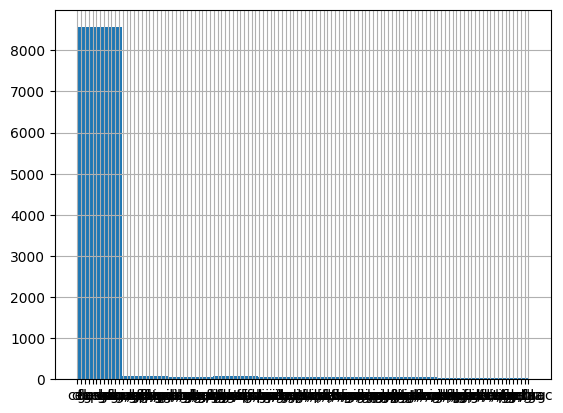

In [17]:
df.label.hist()

In [18]:
#%%capture
#!pip install torchmetrics
#!pip install torch-audiomentations

In [19]:
import os
import random

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import torchaudio

# Não altere esses valores
torch.manual_seed(0)
random.seed(0)

In [20]:
TARGET_SAMPLE_RATE = 16000 # TODO

In [21]:
df[["label","file_path"]].iloc[0]


label                                                      cel
file_path    ./IRMAS/IRMAS-TrainingData/cel/[cel][cla]0081_...
Name: 0, dtype: object

In [22]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [23]:
input_column = "file_path"
output_column = "label"

label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
print(f"A classification problem with {num_labels} classes: {label_list}")

A classification problem with 120 classes: ['cel', 'cel,cla', 'cel,flu', 'cel,gac', 'cel,gel', 'cel,org', 'cel,pia', 'cel,sax', 'cel,tru', 'cel,vio', 'cel,voi', 'cla', 'cla,cel', 'cla,flu', 'cla,gac', 'cla,gel', 'cla,org', 'cla,pia', 'cla,sax', 'cla,tru', 'cla,vio', 'cla,voi', 'flu', 'flu,cel', 'flu,cla', 'flu,gac', 'flu,gel', 'flu,org', 'flu,pia', 'flu,sax', 'flu,tru', 'flu,vio', 'flu,voi', 'gac', 'gac,cel', 'gac,cla', 'gac,flu', 'gac,org', 'gac,pia', 'gac,sax', 'gac,tru', 'gac,vio', 'gac,voi', 'gel', 'gel,cel', 'gel,cla', 'gel,flu', 'gel,gac', 'gel,org', 'gel,pia', 'gel,sax', 'gel,tru', 'gel,vio', 'gel,voi', 'org', 'org,cel', 'org,cla', 'org,flu', 'org,gac', 'org,gel', 'org,pia', 'org,sax', 'org,tru', 'org,vio', 'org,voi', 'pia', 'pia,cel', 'pia,cla', 'pia,flu', 'pia,gac', 'pia,gel', 'pia,org', 'pia,sax', 'pia,tru', 'pia,vio', 'pia,voi', 'sax', 'sax,cel', 'sax,cla', 'sax,flu', 'sax,gac', 'sax,gel', 'sax,org', 'sax,pia', 'sax,tru', 'sax,vio', 'sax,voi', 'tru', 'tru,cel', 'tru,cla', 't

In [24]:
#!pip install torchinfo

In [25]:
from transformers import AutoConfig, Wav2Vec2Processor

/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [26]:
model_name_or_path = "ALM/wav2vec2-large-audioset"
pooling_mode = "mean"

In [27]:

config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    problem_type="multi_label_classification",
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config, 'pooling_mode', pooling_mode)

In [28]:
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path, config=config)
target_sampling_rate = processor.feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

The target sampling rate: 16000


# DATASET

In [29]:
from sklearn.model_selection import train_test_split
# Salvar os dataframes para arquivos CSV
save_path = "./instruments/data_aug/"

df.to_csv(f"{save_path}/train.csv", sep="\t", encoding="utf-8", index=False)
df_test.to_csv(f"{save_path}/test.csv", sep="\t", encoding="utf-8", index=False)

In [30]:
from datasets import load_dataset

data_files = {
    "train": f"{save_path}/train.csv", 
    "validation": f"{save_path}/test.csv",
}

dataset = load_dataset("csv", data_files=data_files, delimiter="\t")
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

Generating train split: 9058 examples [00:00, 556089.08 examples/s]
Generating validation split: 2874 examples [00:00, 345914.53 examples/s]


In [31]:
def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array)
    speech_mono = torch.mean(speech, dim=0).squeeze().numpy()
    return speech_mono

# Função para converter rótulo em tensor de múltiplos rótulos
def label_to_id(label, label_list):
    target_tensor = torch.zeros(len(label_list), dtype=torch.long)
    if isinstance(label, str):
        label = [label]
    for l in label:
        if l in label_list:
            target_tensor[label_list.index(l)] = 1
    return target_tensor

# Função de pré-processamento
def preprocess_function(examples):
    speech_list = [speech_file_to_array_fn(path) for path in examples[input_column]]
    target_list = [label_to_id(label.split(','), label_list) for label in examples[output_column]]
    
    result = processor(speech_list, sampling_rate=target_sampling_rate)
    result["labels"] = target_list
    return result

In [32]:
# Aplicar a função de pré-processamento nos datasets
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=1000,
    batched=True,
)
eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=1000,
    batched=True,
)

idx = 1001
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['label']}")



Map: 100%|██████████| 2874/2874 [00:58<00:00, 49.16 examples/s]

Training labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] - cla


In [33]:
print(f"Training labels: {eval_dataset[idx]['labels']} - {eval_dataset[idx]['label']}")

Training labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] - gel


In [34]:
print(f"Training input_values: {eval_dataset[idx]['input_values']}")


Training input_values: [-0.3645937144756317, 0.023255707696080208, 1.1411956548690796, 0.8025850057601929, 1.0694048404693604, 1.1791799068450928, 0.5470820665359497, -0.4390527904033661, -0.2845275402069092, -0.8818285465240479, -1.4161536693572998, -0.8180631399154663, -0.3818298876285553, -0.3925371766090393, -1.618550181388855, -1.8342474699020386, -2.1072051525115967, -0.6804851293563843, -0.7221139073371887, -1.7292646169662476, -1.2609604597091675, -0.9817504286766052, -1.9267207384109497, -2.6834938526153564, -2.551825523376465, -2.2252390384674072, -0.3889347016811371, 0.04978562891483307, 0.8230610489845276, 1.0036646127700806, -0.17845433950424194, -1.7785263061523438, -1.53622567653656, -0.20206379890441895, -0.33500412106513977, -0.9383736252784729, -2.3559975624084473, -3.0025720596313477, -2.575997829437256, -2.756636619567871, -1.456386685371399, -1.2158622741699219, -1.4343012571334839, -2.9951202869415283, -3.3230650424957275, -2.3572914600372314, -1.6670387983322144,

In [35]:
print(f"Training input_values: {train_dataset[idx]['input_values']}")
print(f"Training attention_mask: {train_dataset[idx]['attention_mask']}")
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['label']}")

Training input_values: [0.09737139940261841, 0.6170694828033447, 0.5877460241317749, 0.3557693362236023, 0.5433286428451538, 1.126096248626709, 1.5605249404907227, 1.4675496816635132, 1.1552098989486694, 1.1111700534820557, 1.3035870790481567, 1.4589118957519531, 1.3349546194076538, 0.8330746293067932, 0.07534032315015793, -0.588683545589447, -1.0449762344360352, -1.321420669555664, -1.3056046962738037, -0.7713770866394043, 0.09043056517839432, 0.713137149810791, 0.6981788873672485, 0.3307783603668213, 0.3266040086746216, 0.8353581428527832, 1.2728242874145508, 1.0920085906982422, 0.4590712785720825, 0.0012697747442871332, -0.11551967263221741, -0.17101150751113892, -0.40660226345062256, -0.8948519229888916, -1.607226014137268, -2.191842794418335, -2.385108470916748, -2.3193953037261963, -2.117116689682007, -1.5216442346572876, -0.5342454314231873, 0.34855273365974426, 0.5934998393058777, 0.3172006905078888, 0.23103344440460205, 0.6664861440658569, 1.270923137664795, 1.461666464805603,

In [36]:
#!pavf/bin/pip uninstall -y datasets

#!pavf/bin/pip install datasets


In [37]:
#!pavf/bin/pip install torchinfo torchmetrics torch-audiomentations

# Model

In [38]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None


In [39]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)


class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class Wav2Vec2ForSpeechClassification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = Wav2Vec2ClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [40]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Union
import torch

import transformers
from transformers import Wav2Vec2Processor


@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch


In [41]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [42]:
is_regression = False

In [43]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

from transformers import EvalPrediction


def compute_metrics(p):
    """
    Computes accuracy, F1-score, precision, and recall for multi-class classification.
    
    Args:
      p (EvalPrediction): An object containing predictions and labels.
    
    Returns:
      dict: A dictionary containing accuracy, F1-score, precision, and recall.
    """

    # Convert predictions to numpy array for metric calculations
    preds = np.array(p.predictions)
    labels = np.array(p.label_ids)

    min_vals = preds.min(axis=1, keepdims=True)
    max_vals = preds.max(axis=1, keepdims=True)
    normalized_preds = (preds - min_vals) / (max_vals - min_vals + 1e-10)

    thresh = 0.5
    preds = (normalized_preds > thresh).astype(float) 


    # Calculate accuracy
    accuracy = (preds == labels).mean().item()

    # Calculate F1-score (macro-average by default)
    f1 = f1_score(labels, preds, average='macro',zero_division=0.0)

    # Calculate precision (macro-average by default)
    precision = precision_score(labels, preds, average='macro')

    # Calculate recall (macro-average by default)
    recall = recall_score(labels, preds, average='macro')

    return {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
    }


In [44]:
model = Wav2Vec2ForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config,
)


Some weights of Wav2Vec2ForSpeechClassification were not initialized from the model checkpoint at ALM/wav2vec2-large-audioset and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
model.freeze_feature_extractor()

In [46]:
#!pavf/bin/pip install torch torchvision torchaudio


In [47]:
#!pavf/bin/pip uninstall -y accelerate

In [48]:
#!pavf/bin/pip install accelerate -U

In [49]:
import torch
print(torch.version.cuda)


12.1


In [50]:
os.environ['WORLD_SIZE'] = '1'
os.environ['MASTER_ADDR'] = 'localhost'
os.environ['MASTER_PORT'] = '12358'

In [ ]:
import os
from transformers import TrainerCallback, TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./IRMAS_check_aug",
    per_device_train_batch_size=100,
    per_device_eval_batch_size=100,
    gradient_accumulation_steps=2,
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Adicionando save_strategy para "epoch"
    num_train_epochs=20.0,
    fp16=True,
    save_steps=65,
    eval_steps=65,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=15,
    report_to="wandb",
    no_cuda=False,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False
)

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor.feature_extractor
)

trainer.train()

/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: faresmatheus (enem). Use `wandb login --relogin` to force relogin


[rank0]:[W reducer.cpp:1389] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operator())


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.082700,0.066570,0.494268,0.022936,0.014257,0.091667
2,0.032600,0.044147,0.922590,0.022936,0.014257,0.091667
4,0.030700,0.042722,0.922590,0.022936,0.014257,0.091667


/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/matheus.fares/PAV/pavf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/ho